In [43]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plot

def nash_equilibrium(a):
    # preprocessing matrix for linprog
    a = np.array(a)
    aij_min = a.min()
    was_normalization = False
    if aij_min <= 0:
        a -= aij_min - 1
        was_normalization = True
        
    c = [1] * len(a)
    A_ub = -a.T
    b_ub = [-1] * len(a[0])
    
    first_distribution = linprog(c, A_ub, b_ub).x 
    game_value = 1 / np.sum(first_distribution)
    first_distribution *= game_value
    
    c, b_ub = b_ub, c
    A_ub = a
    second_distribution = linprog(c, A_ub, b_ub).x * game_value
    
    if was_normalization:
        game_value += aij_min - 1
    
    return game_value, first_distribution, second_distribution

def draw_distribution(dist):
    plot.xlim([0, len(dist)+1])
    plot.ylim([0, np.max(dist)+1])
    for i in range(len(dist)):
        plot.scatter(i+1, dist[i])
        plot.plot([i+1, i+1], [0, dist[i]])
    plot.show()
    
def represent_nash_equilibrium(game_matrix):
    gv, fd, sd = nash_equilibrium(game_matrix)
    print("Значение игры = ", gv)
    print("Стратегия Игрока 1: ", fd)
    draw_distribution(fd)
    print("Стратегия Игрока 2: ", sd)
    draw_distribution(sd)

# Существует равновесие Нэша

Значение игры =  5.0
Стратегия Игрока 1:  [ 0.  1.  0.]


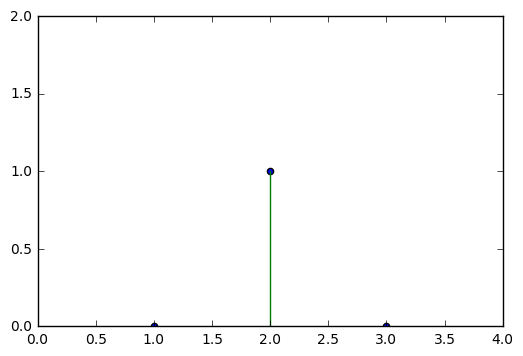

Стратегия Игрока 2:  [ 0.  0.  1.  0.]


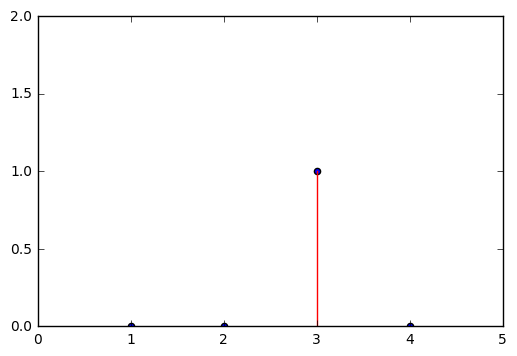

In [39]:
a = [[8, 7, 0, 6],
    [6, 8, 5, 10],
    [8, 8, 5, 10]]
represent_nash_equilibrium(a)

## Стоит отметить, что этот метод не всегда находит решение в чистых стратегиях
Положение равновесия (i, j) = (2, 3). При этом значение антагонистической игры не зависит от выбора определённой оптимальной стратегии как чистой, так и смешанной.

Значение игры =  1.0
Стратегия Игрока 1:  [ 0.66666667  0.33333333  0.          0.        ]


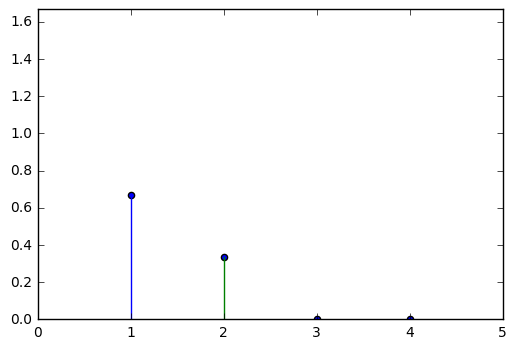

Стратегия Игрока 2:  [ 0.  0.  1.]


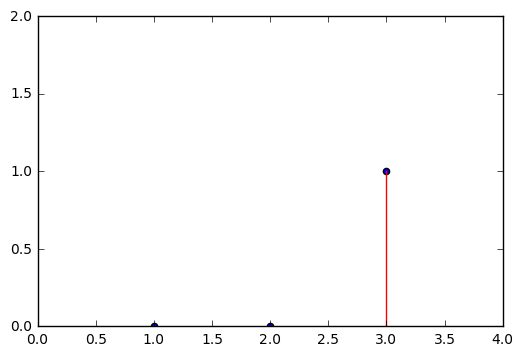

In [45]:
a = [[0, 2, 1],
    [3, 4, 1],
    [2, -3, 0],
    [0, 3, 0]]
represent_nash_equilibrium(a)

## Игра с циклической квадратной матрицей всегда имеет решение в виде равномерного распределения.

Значение игры =  3.0
Стратегия Игрока 1:  [ 0.2  0.2  0.2  0.2  0.2]


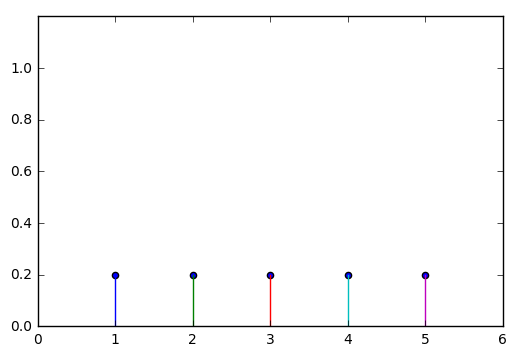

Стратегия Игрока 2:  [ 0.2  0.2  0.2  0.2  0.2]


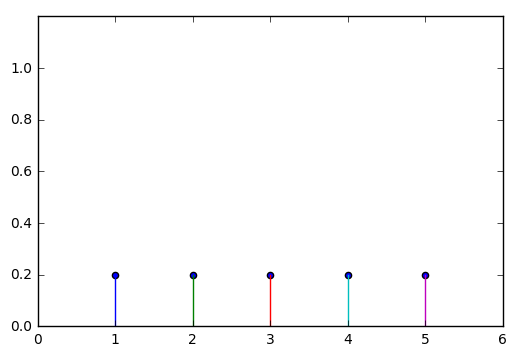

In [47]:
a = [[1, 2, 3, 4, 5],
    [5, 1, 2, 3, 4],
    [4, 5, 1, 2, 3],
    [3, 4, 5, 1, 2],
    [2, 3, 4, 5, 1]]
represent_nash_equilibrium(a)

# Необходимое условие полноты спектра решений антагонистической матричной игры: матрица игры - квадратная[1]

## Спектр стратегии одного из игроков в любой игре с прямоугольной матрицей будет неполон

Значение игры =  2.25
Стратегия Игрока 1:  [ 0.5   0.25  0.25]


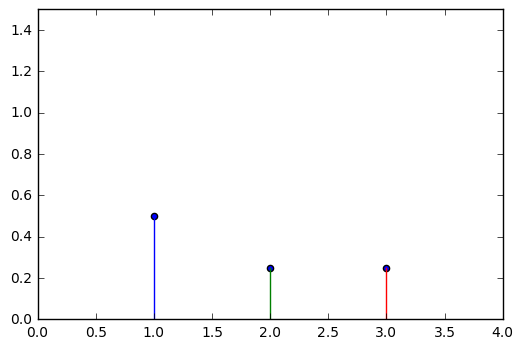

Стратегия Игрока 2:  [ 0.25  0.25  0.5   0.  ]


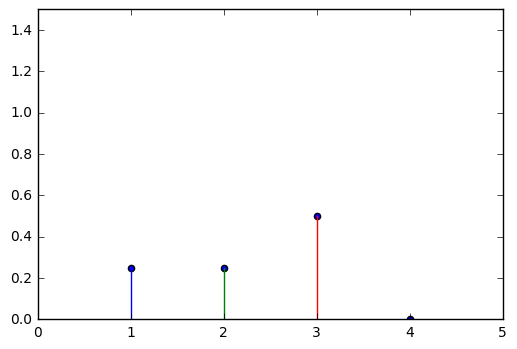

In [33]:
a = [[1, 2, 3, 4],
    [4, 1, 2, 3],
    [3, 4, 1, 2]]
represent_nash_equilibrium(a)

Значение игры =  2.27272727273
Стратегия Игрока 1:  [ 0.54545455  0.45454545]


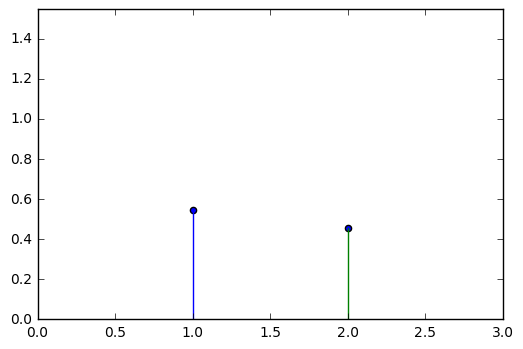

Стратегия Игрока 2:  [ 0.          0.45454545  0.          0.54545455]


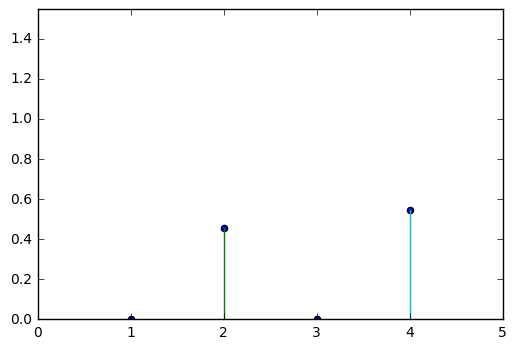

In [8]:
a = [[3, 5, 2, 0],
    [6, -1, 3, 5]]
represent_nash_equilibrium(a)

## Но это условие не является достаточным

Значение игры =  2.33333333333
Стратегия Игрока 1:  [ 0.          0.          0.66666667  0.33333333]


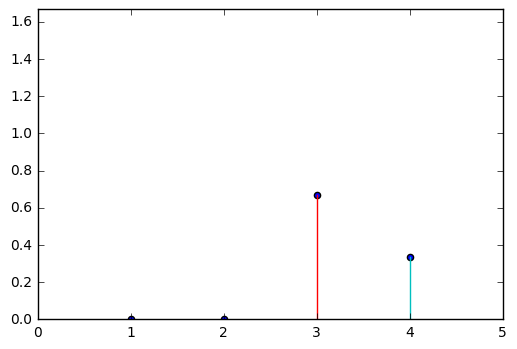

Стратегия Игрока 2:  [ 0.          0.33333333  0.66666667  0.        ]


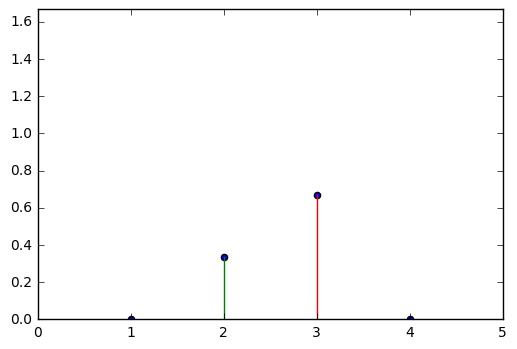

In [9]:
a = [[1, 2, 1, 2],
    [2, 1, 2, 4],
    [3, 3, 2, 2],
    [4, 1, 3, 3]]
represent_nash_equilibrium(a)

#  Ссылки

1. Васин, Морозов "Теория игр и модели математичиской экономики"